In [1]:
# pyg.walk(train)
# !pip install pygwalker
# import pygwalker as pyg

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
test = pd.read_csv("/content/drive/MyDrive/Data /house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Data /house-prices-advanced-regression-techniques/train.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.shape

(1460, 81)

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Handling Nulls

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
missing_percentage = train.isnull().sum()/len(train)
missing_percentage[missing_percentage>0] #considering one those in which there is at least 1 missing value

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [11]:
more_than_30pc_na =  missing_percentage[missing_percentage>0.3].index
train.drop(columns=more_than_30pc_na, inplace = True)
test.drop(columns=more_than_30pc_na, inplace = True)

In [12]:
# All categorical and continuous variables
categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
                  'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                  'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
                  'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
                  'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
                  'SaleType', 'SaleCondition']

continuous_cols = list(set(train.columns) - set(categorical_cols))


In [13]:
categorical_cols_tmp = []
continuous_cols_tmp = []

for i in categorical_cols:
  if(i in train.columns):
    categorical_cols_tmp.append(i)

for i in continuous_cols:
  if(i in train.columns):
    continuous_cols_tmp.append(i)

continuous_cols = continuous_cols_tmp
categorical_cols = categorical_cols_tmp


In [14]:
len(categorical_cols + continuous_cols)   # No. of variables to analyze

76

In [15]:
print(categorical_cols)
print(continuous_cols)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
['LotFrontage', 'GarageArea', 'Id', 'OpenPorchSF', 'MiscVal', 'LowQualFinSF', 'MasVnrArea', 'BsmtFinSF2', 'EnclosedPorch', 'GrLivArea', 'GarageYrBlt', '1stFlrSF', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'LotArea', 'YearRemodAdd', 'WoodDeckSF', 'TotalBsmtSF', 'ScreenPorc

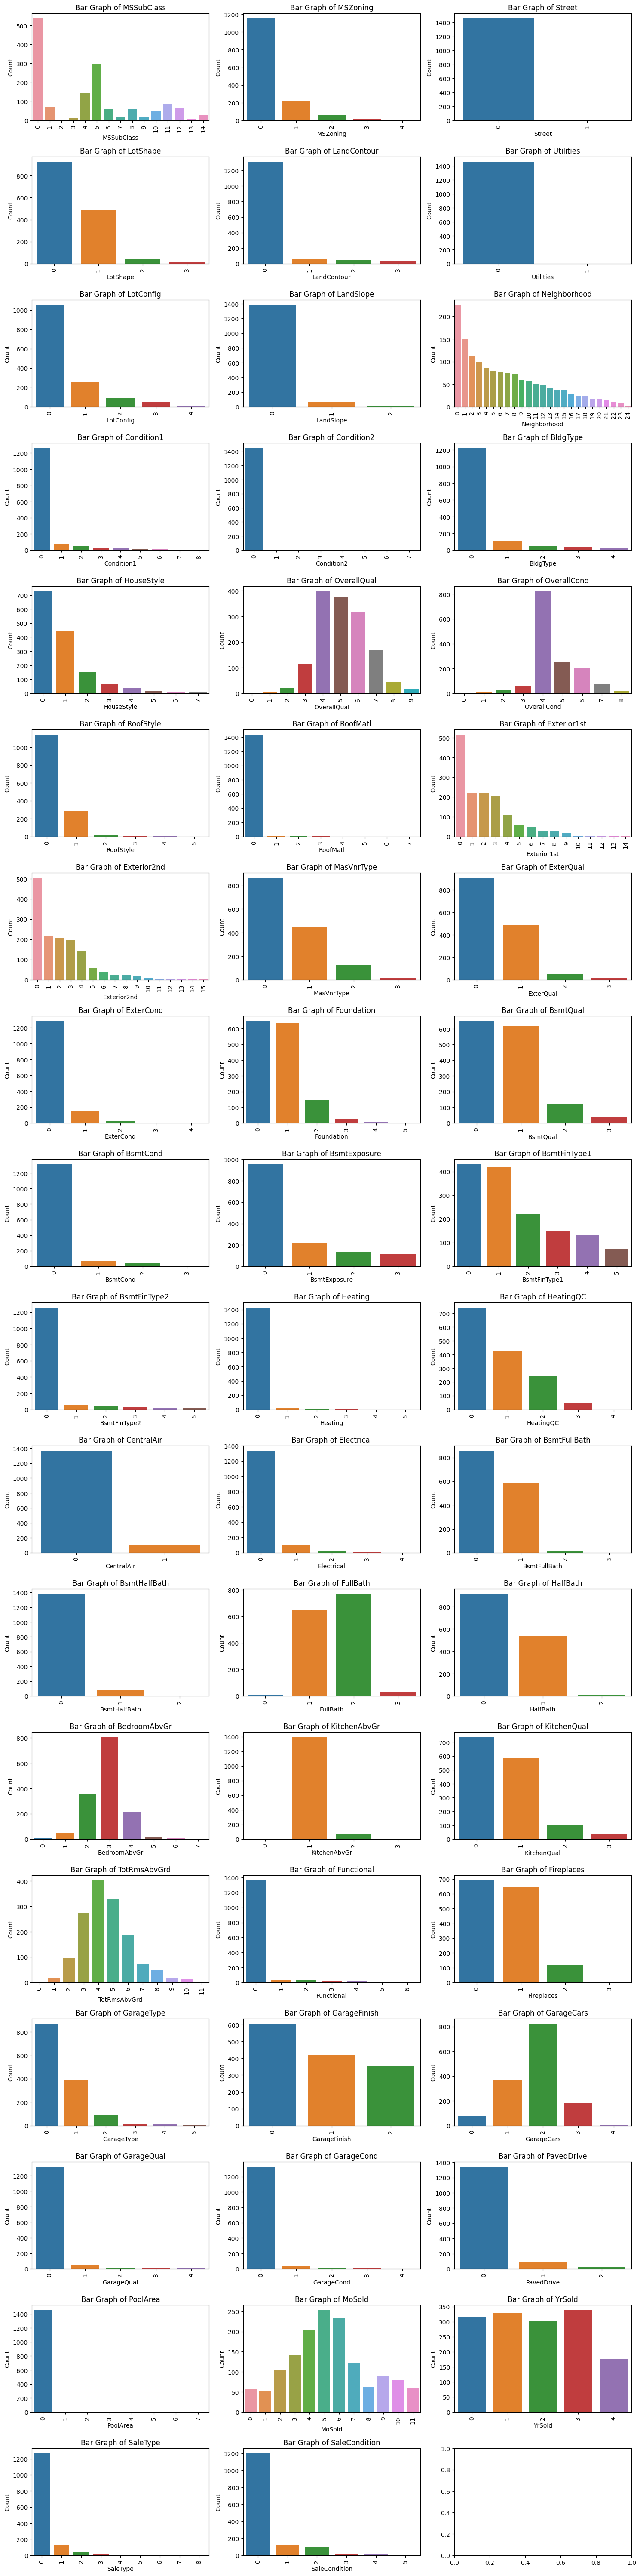

In [16]:
# Initialize the subplot function using the number of rows and columns
figure, axes = plt.subplots(nrows=len(categorical_cols) // 3 + 1, ncols=3, figsize=(15, 60))

# Iterate through each categorical variable
for i, col in enumerate(categorical_cols):

    # Get the value counts of the categorical variable
    value_counts = train[col].value_counts()

    # Create a DataFrame from value counts
    count_df = pd.DataFrame({col: value_counts.index, 'Count': value_counts.values})

    # Plot the bar graph
    sns.barplot(x=col, y='Count', data=count_df, ax=axes[i // 3, i % 3])

    # Set labels and title
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].set_ylabel('Count')
    axes[i // 3, i % 3].set_title(f'Bar Graph of {col}')

    # Rotate x-axis ;abels
    axes[i // 3, i % 3].set_xticklabels(count_df[col].index, rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# Features which hold less relevance based on histogram analysis
categorical_cols_low_relevance = ["Street", "PoolArea", "MSZoning", "LandContour", "Utilities", "LandSlope", "Condition1", "Condition2", "RoofMatl", "BsmtCond", "BsmtFinType2", "Heating", "CentralAir", "Electrical", "BsmtHalfBath", "KitchenAbvGr", "Functional", "GarageQual", "GarageCond", "PavedDrive", "PoolArea", "SaleType", "SaleCondition"]

In [18]:
train.drop(columns = categorical_cols_low_relevance, inplace = True)
test.drop(columns = categorical_cols_low_relevance, inplace = True)

## Evaluating the continuous variables

In [19]:
print(continuous_cols)
print(len(continuous_cols))

['LotFrontage', 'GarageArea', 'Id', 'OpenPorchSF', 'MiscVal', 'LowQualFinSF', 'MasVnrArea', 'BsmtFinSF2', 'EnclosedPorch', 'GrLivArea', 'GarageYrBlt', '1stFlrSF', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'LotArea', 'YearRemodAdd', 'WoodDeckSF', 'TotalBsmtSF', 'ScreenPorch', '3SsnPorch', '2ndFlrSF', 'SalePrice']
23


<ipython-input-20-8fad235c5576>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_values.unique(), rotation=90)
<ipython-input-20-8fad235c5576>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_values.unique(), rotation=90)
<ipython-input-20-8fad235c5576>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_values.unique(), rotation=90)
<ipython-input-20-8fad235c5576>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_values.unique(), rotation=90)
<ipython-input-20-8fad235c5576>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_values.unique(), rotation=90)
<ipython-input-20-8fad235c5576>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_values.unique(),

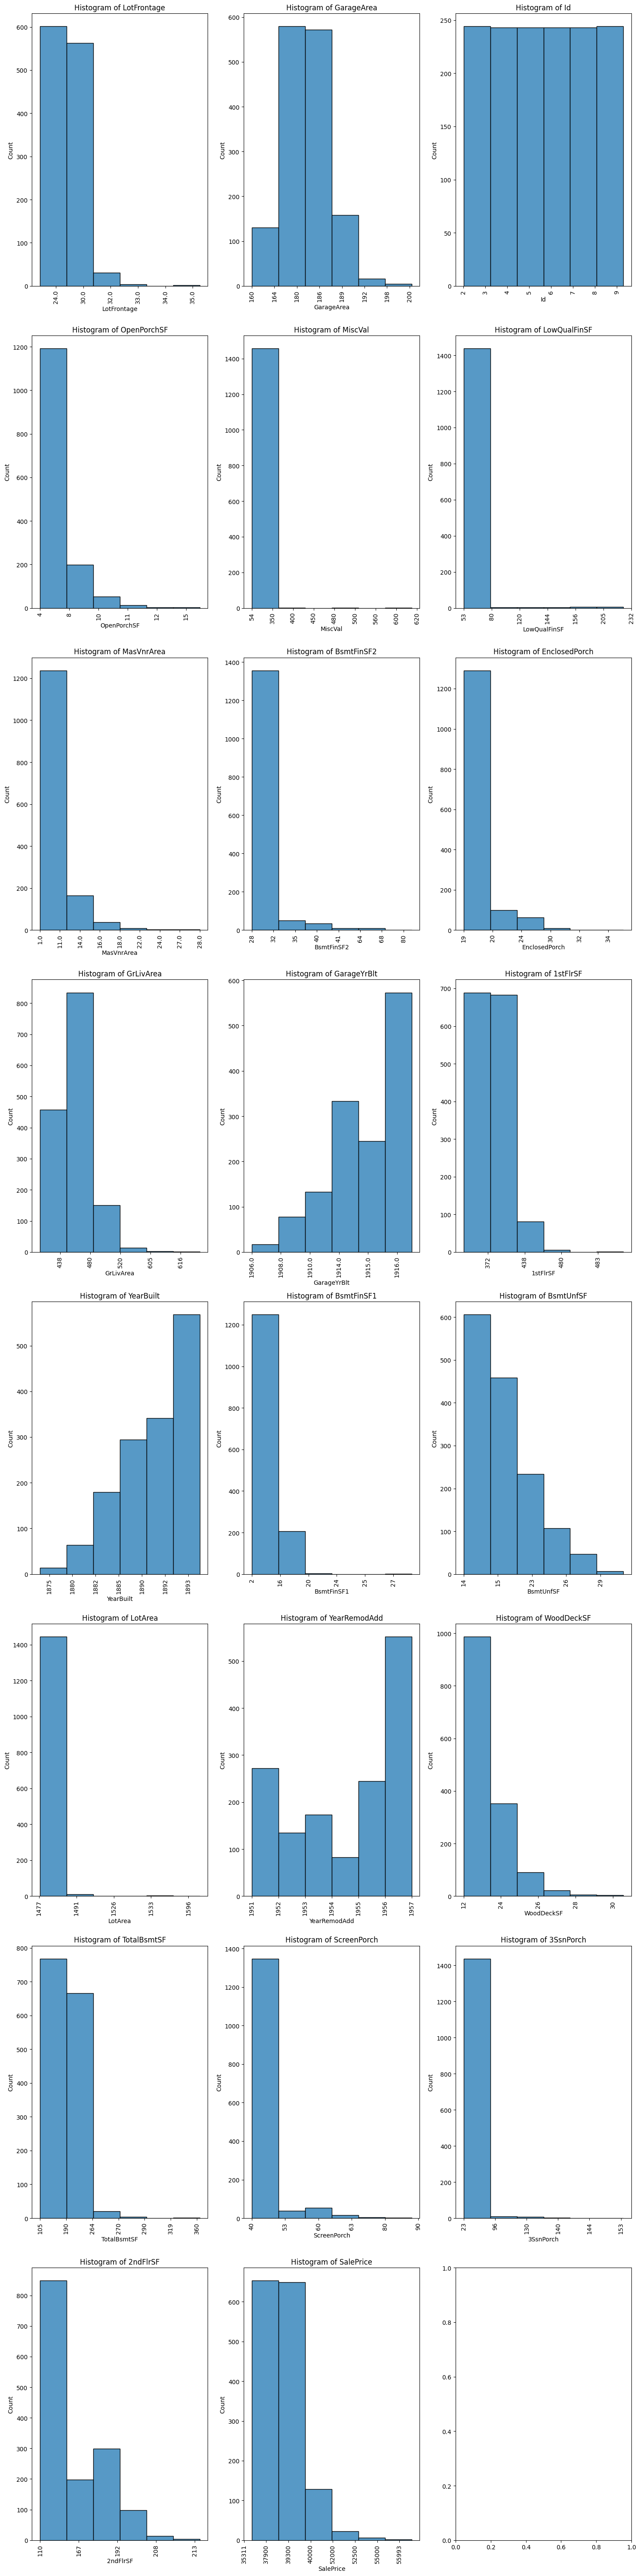

In [20]:
# Initialize the subplot function using the number of rows and columns
fig, axes = plt.subplots(nrows=len(continuous_cols) // 3 + 1, ncols=3, figsize=(15, 60))

# Iterate through each continuous variable
for i, col in enumerate(continuous_cols):

    # Sort the values in ascending order
    sorted_values = train[col].sort_values()

    # Plot the histogram using sns.histplot
    ax = axes[i // 3, i % 3]
    sns.histplot(sorted_values, ax=ax, bins=6)

    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {col}')

    # Rotate x-axis labels
    ax.set_xticklabels(sorted_values.unique(), rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
continuous_cols_low_relevance = ["3SsnPorch","LowQualFinSF","BsmtFinSF2","LotArea","MiscVal","ScreenPorch"]
train.drop(columns = continuous_cols_low_relevance, inplace = True)
test.drop(columns = continuous_cols_low_relevance, inplace = True)

In [22]:
categorical_cols = [col for col in categorical_cols if col not in categorical_cols_low_relevance]
continuous_cols = [col for col in continuous_cols if col not in continuous_cols_low_relevance]

In [23]:
print(len(categorical_cols) + len(continuous_cols))

48


## Removing Multicollenearity using Pearson Correlation Analysis

In [24]:
# removing id variable before finding correlation
train.drop(columns = "Id", inplace = True)
test.drop(columns = "Id", inplace = True)

In [25]:
df_target = train['SalePrice']
train.drop(columns = "SalePrice", inplace = True)

In [26]:
continuous_cols.remove("Id")
continuous_cols.remove("SalePrice")

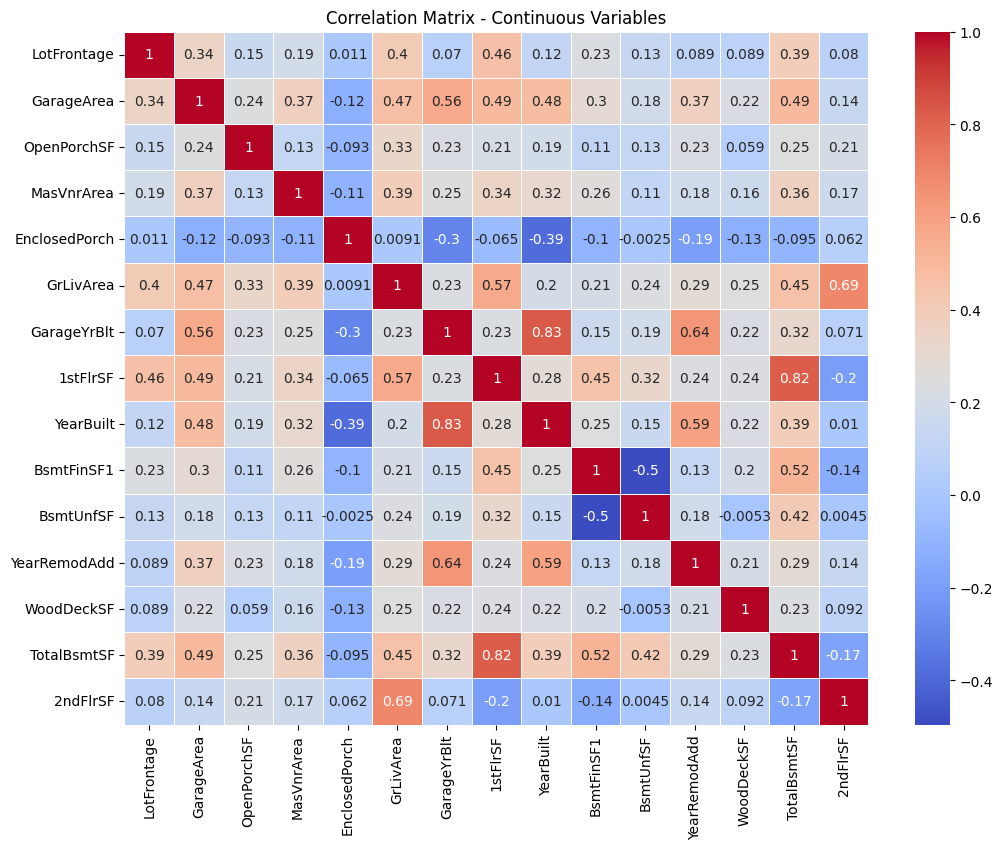

In [27]:
# Create a DataFrame with continuous variables
df_continuous = train[continuous_cols]

# Create a correlation matrix
cor = df_continuous.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Continuous Variables')
plt.show()

In [28]:
# with the following function we can select highly correlated features
# it will remove first feature that is highly correlated with any other feature

def correlation(dataset, threshold):
  col_corr = set() # Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coefficient value
        print(abs(corr_matrix.iloc[i,j]))
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [29]:
corr_features = correlation(df_continuous, 0.6)
print(corr_features)

0.8256674841743407
0.6422767797035356
0.8195299750050338
0.6875010641666034
{'YearBuilt', 'TotalBsmtSF', '2ndFlrSF', 'YearRemodAdd'}


In [30]:
train.drop(columns = corr_features, inplace = True)
test.drop(columns = corr_features, inplace = True)

In [31]:
for i in corr_features:
  continuous_cols.remove(i)

In [32]:
for i in corr_features:
  df_continuous.drop(columns = i, inplace = True)

<ipython-input-32-e86a742161bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.drop(columns = i, inplace = True)
<ipython-input-32-e86a742161bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.drop(columns = i, inplace = True)
<ipython-input-32-e86a742161bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.drop(columns = i, inplace = True)
<ipython-input-32-e86a742161bb>:2: SettingWithCopyWa

In [33]:
df_continuous.columns

Index(['LotFrontage', 'GarageArea', 'OpenPorchSF', 'MasVnrArea',
       'EnclosedPorch', 'GrLivArea', 'GarageYrBlt', '1stFlrSF', 'BsmtFinSF1',
       'BsmtUnfSF', 'WoodDeckSF'],
      dtype='object')

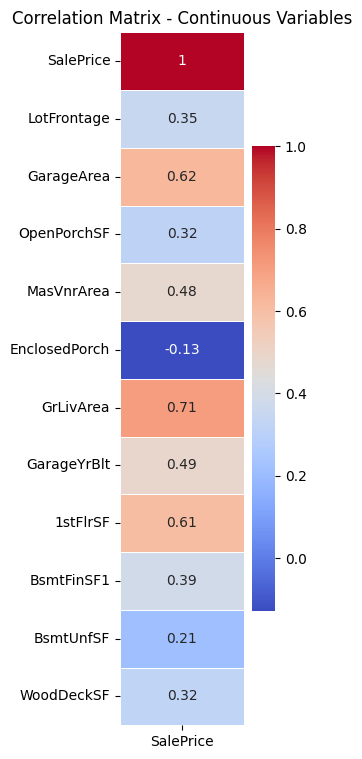

In [34]:
correlation_matrix = pd.concat([df_target, df_continuous], axis=1).corr()

# Access the correlation values with respect to the target variable
correlation_with_target = correlation_matrix.loc['SalePrice']

plt.figure(figsize=(2, 9))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Continuous Variables')
plt.show()

In [35]:
train.shape

(1460, 42)

In [36]:

low_corr_w_target = []
for i in correlation_with_target.index:
  if(abs(correlation_with_target[i]) < 0.4):
    low_corr_w_target.append(i)
print(low_corr_w_target)
train.drop(columns = low_corr_w_target, inplace = True)
test.drop(columns = low_corr_w_target, inplace = True)

['LotFrontage', 'OpenPorchSF', 'EnclosedPorch', 'BsmtFinSF1', 'BsmtUnfSF', 'WoodDeckSF']


## correcting

In [37]:
for i in low_corr_w_target:
  continuous_cols.remove(i)

In [38]:
train.shape

(1460, 36)

In [39]:
print(continuous_cols)

['GarageArea', 'MasVnrArea', 'GrLivArea', 'GarageYrBlt', '1stFlrSF']


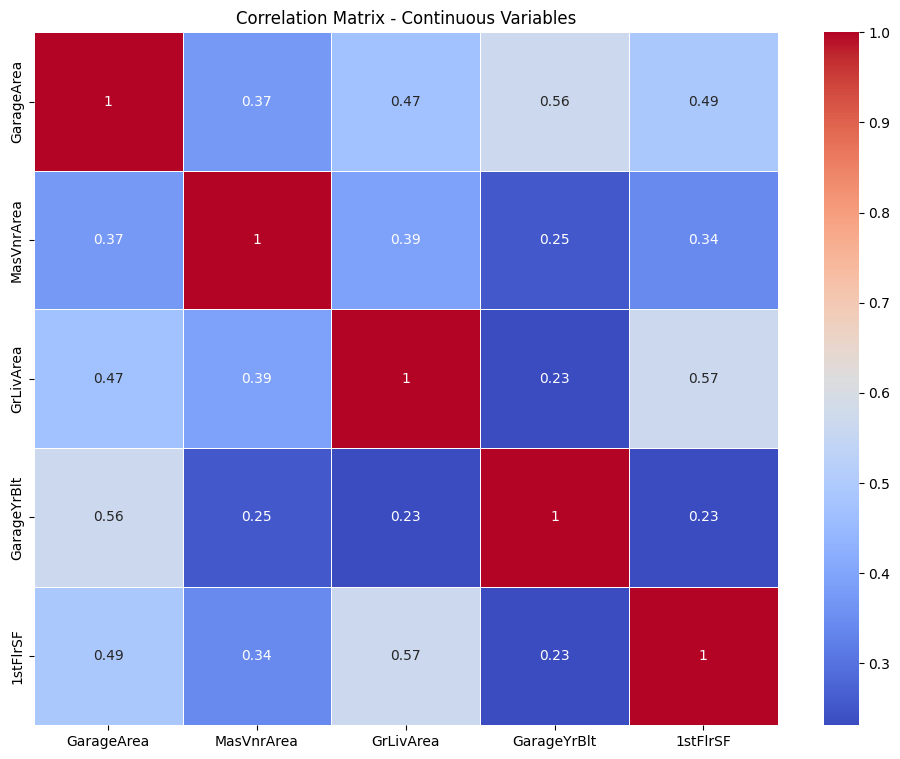

In [40]:
# Create a DataFrame with continuous variables
df_continuous = train[continuous_cols]

# Create a correlation matrix
cor = df_continuous.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Continuous Variables')
plt.show()

## Categorical Variables EDA

In [41]:
print(len(categorical_cols))

31


In [42]:
print(categorical_cols)

['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'MoSold', 'YrSold']


In [43]:
df_cat = pd.concat([train[categorical_cols], df_target], axis=1)

In [44]:
df_cat.head()

,MSSubClass,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,MoSold,YrSold,SalePrice
0,60,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Ex,1,2,1,3,Gd,8,0,Attchd,RFn,2,2,2008,208500
1,20,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Ex,0,2,0,3,TA,6,1,Attchd,RFn,2,5,2007,181500
2,60,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Ex,1,2,1,3,Gd,6,1,Attchd,RFn,2,9,2008,223500
3,70,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Gd,1,1,0,3,Gd,7,1,Detchd,Unf,3,2,2006,140000
4,60,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Ex,1,2,1,4,Gd,9,1,Attchd,RFn,3,12,2008,250000


In [45]:
df_cat.columns

Index(['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

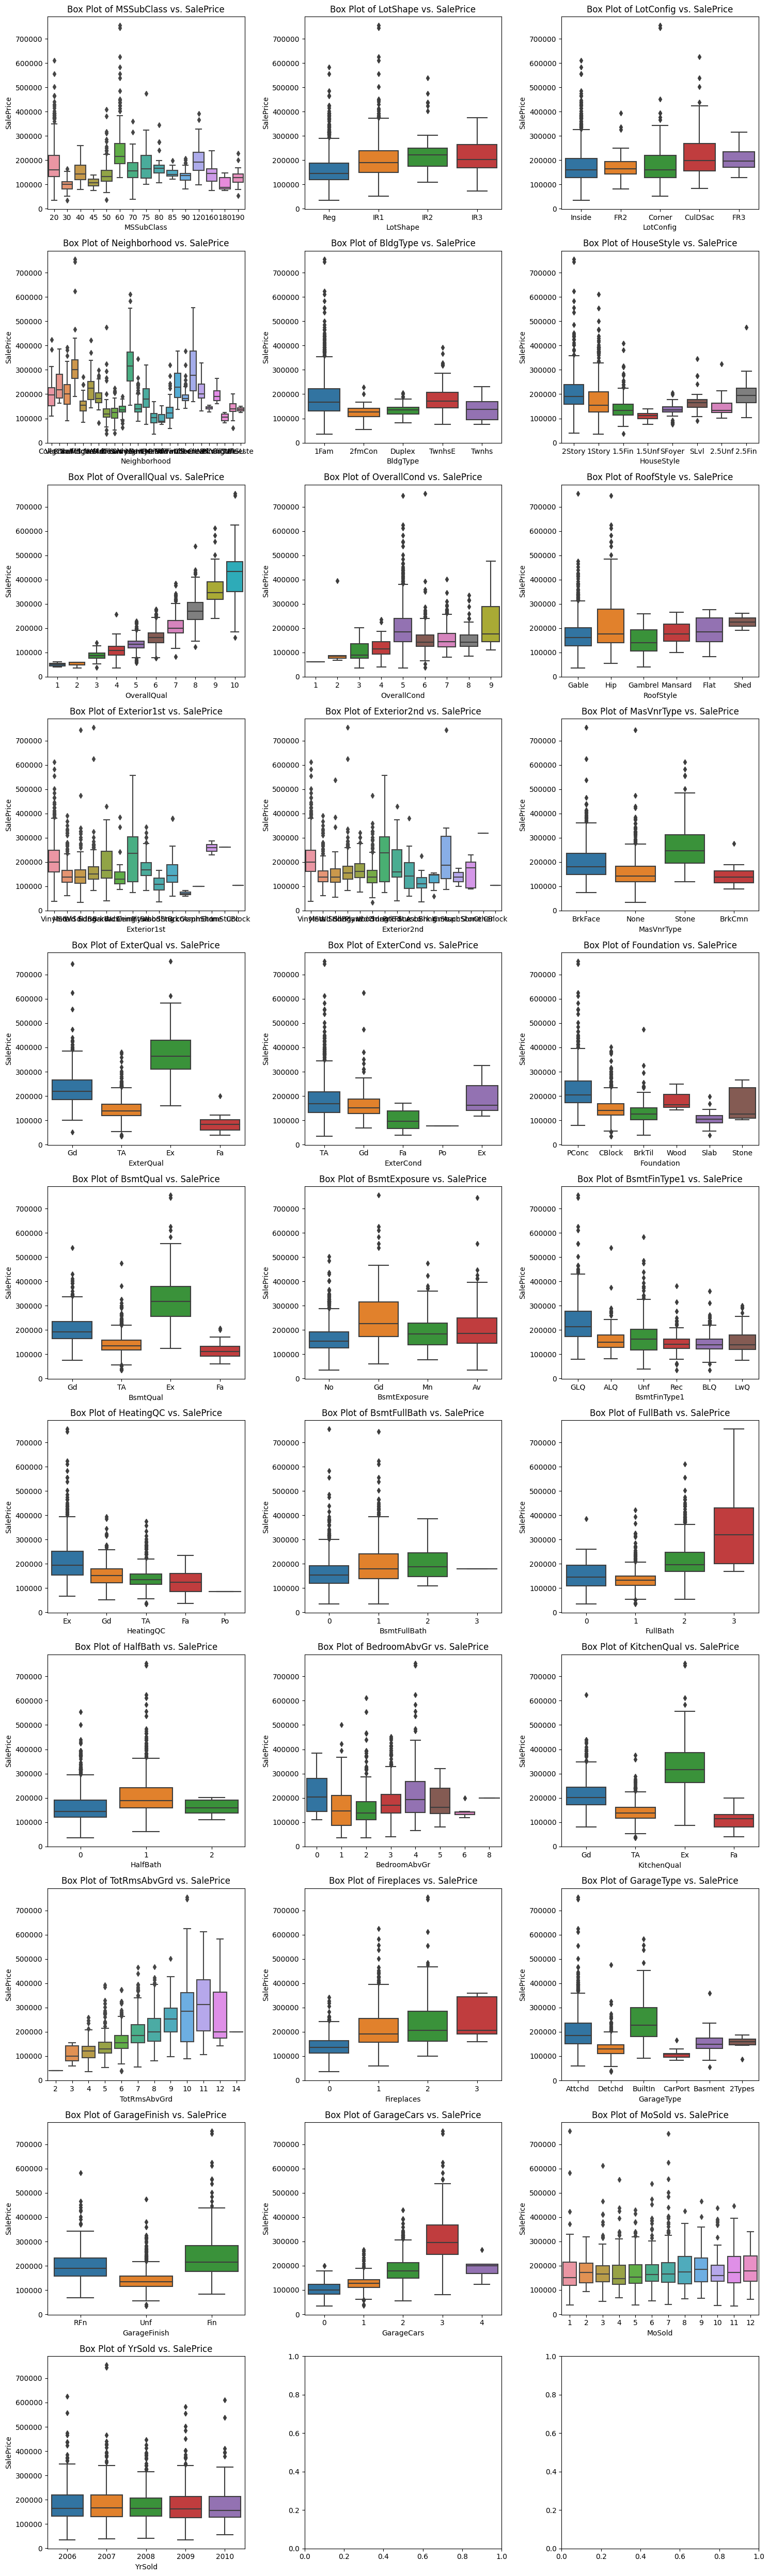

In [46]:
# Initialize the subplot function using the number of rows and columns
fig, axes = plt.subplots(nrows=len(categorical_cols) // 3 + 1, ncols=3, figsize=(15, 50))

# Iterate through each categorical variable
for i, col in enumerate(categorical_cols):
    # Plot the box plot using sns.boxplot
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=col, y='SalePrice', data=df_cat, ax=ax)

    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'Box Plot of {col} vs. SalePrice')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Because all categorical features have 3 or more unique categoreies, we will preform <b>Kruskal-Wallis</b> test to select thee top 5 variables with more significant differences b/w groups(lowest-p-value)

In [47]:
cat_var_list = categorical_cols
cat_var_3v = df_cat

In [48]:
print(cat_var_list)
print(cat_var_3v.columns)

['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'MoSold', 'YrSold']
Index(['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')


In [49]:
target_variable = "SalePrice"

In [50]:
from scipy.stats import kruskal

# Dataframe with the p-value for each Variable

df_kruskal = pd.DataFrame(columns=['Variable', 'statistic', 'pvalue'])

for var in cat_var_list:
    groups = []
    for group in cat_var_3v[var].dropna().unique():

        list_of_values = cat_var_3v[target_variable][cat_var_3v[var] == group].values

        list_of_values = [x for x in list_of_values if np.isnan(x) == False]

        groups.append(list_of_values)

    statistic, pvalue = kruskal(*groups)
    row = {'Variable': var, 'statistic': statistic, 'pvalue': pvalue}
    df_kruskal = df_kruskal.append(row, ignore_index=True)


df_kruskal.sort_values(by=['pvalue'], ignore_index=True, inplace=True)

df_kruskal

<ipython-input-50-6ecedd50fbdf>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kruskal = df_kruskal.append(row, ignore_index=True)
<ipython-input-50-6ecedd50fbdf>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kruskal = df_kruskal.append(row, ignore_index=True)
<ipython-input-50-6ecedd50fbdf>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kruskal = df_kruskal.append(row, ignore_index=True)
<ipython-input-50-6ecedd50fbdf>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kruskal = df_kruskal.append(row, ignore_index=True)
<ipython-input-50-6ecedd50fbdf>:19: FutureWarning: The frame.append method is deprecated and wil

,Variable,statistic,pvalue
0,OverallQual,966.102773,3.506973e-202
1,Neighborhood,868.532376,6.696799e-168
2,GarageCars,702.506906,9.986628e-151
3,ExterQual,683.440084,8.180798e-148
4,KitchenQual,661.481587,4.720113e-143
5,BsmtQual,631.833154,1.265030e-136
6,FullBath,599.364160,1.384314e-129
7,GarageFinish,505.207812,1.974775e-110
8,MSSubClass,531.535770,1.896860e-104
9,Foundation,488.722751,2.169096e-103


In [51]:
# Choosing the top 5 more relevant categories -> lowest pvalue
df_top5_cat_var = df_kruskal[:5]
df_top5_cat_var

,Variable,statistic,pvalue
0,OverallQual,966.102773,3.506973e-202
1,Neighborhood,868.532376,6.696799e-168
2,GarageCars,702.506906,9.986628e-151
3,ExterQual,683.440084,8.180798e-148
4,KitchenQual,661.481587,4.720113e-143


In [52]:
list_top5_cat_vars = df_top5_cat_var['Variable'].tolist()
list_top5_cat_vars

['OverallQual', 'Neighborhood', 'GarageCars', 'ExterQual', 'KitchenQual']

In [53]:
# Deleting Variables with less statistical difference between groups

vars_to_delete = [x for x in cat_var_list if x not in list_top5_cat_vars]
# vars_to_delete.remove('SalePrice')
train.drop(columns = vars_to_delete, inplace=True)
test.drop(columns = vars_to_delete, inplace = True)
train.shape

(1460, 10)

## The Kruskal-Wallis test does not says which group/groups is/are different from the others. To know this we need a post-hoc test, and the test that will be used here is the **Dunn's test**, which is a pairwise multiple comparisons procedure used to determine which groups have more statistically significant differences:

## **Null Hypothesis** -> There is no difference between groups

## **Low p-value** -> The groups differ significantly

In [54]:
# Dataframe for the post-hoc test
df_post_hoc = cat_var_3v[list_top5_cat_vars]
df_post_hoc = df_post_hoc.join(cat_var_3v['SalePrice'])
df_post_hoc.head()

,OverallQual,Neighborhood,GarageCars,ExterQual,KitchenQual,SalePrice
0,7,CollgCr,2,Gd,Gd,208500
1,6,Veenker,2,TA,TA,181500
2,7,CollgCr,2,Gd,Gd,223500
3,7,Crawfor,3,TA,Gd,140000
4,8,NoRidge,3,Gd,Gd,250000


In [55]:
categorical_cols = list_top5_cat_vars

In [56]:
# Installing and importing the scikit-posthocks package
!pip install scikit-posthocs

import scikit_posthocs as sp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
df_post_hoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   GarageCars    1460 non-null   int64 
 3   ExterQual     1460 non-null   object
 4   KitchenQual   1460 non-null   object
 5   SalePrice     1460 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 68.6+ KB


In [58]:
# List with the matrices related to each variable for the posthoc test
list_dunn_matrices = []
# dropna to perform the post-hoc test
df_post_hoc.dropna(inplace=True)

for var in list_top5_cat_vars:
    dunn_matrix = sp.posthoc_dunn(df_post_hoc, val_col = 'SalePrice', group_col = var, p_adjust='bonferroni')
    list_dunn_matrices.append(dunn_matrix)

In [ ]:
print(list_dunn_matrices)

## **Neighborhood**

<Axes: >

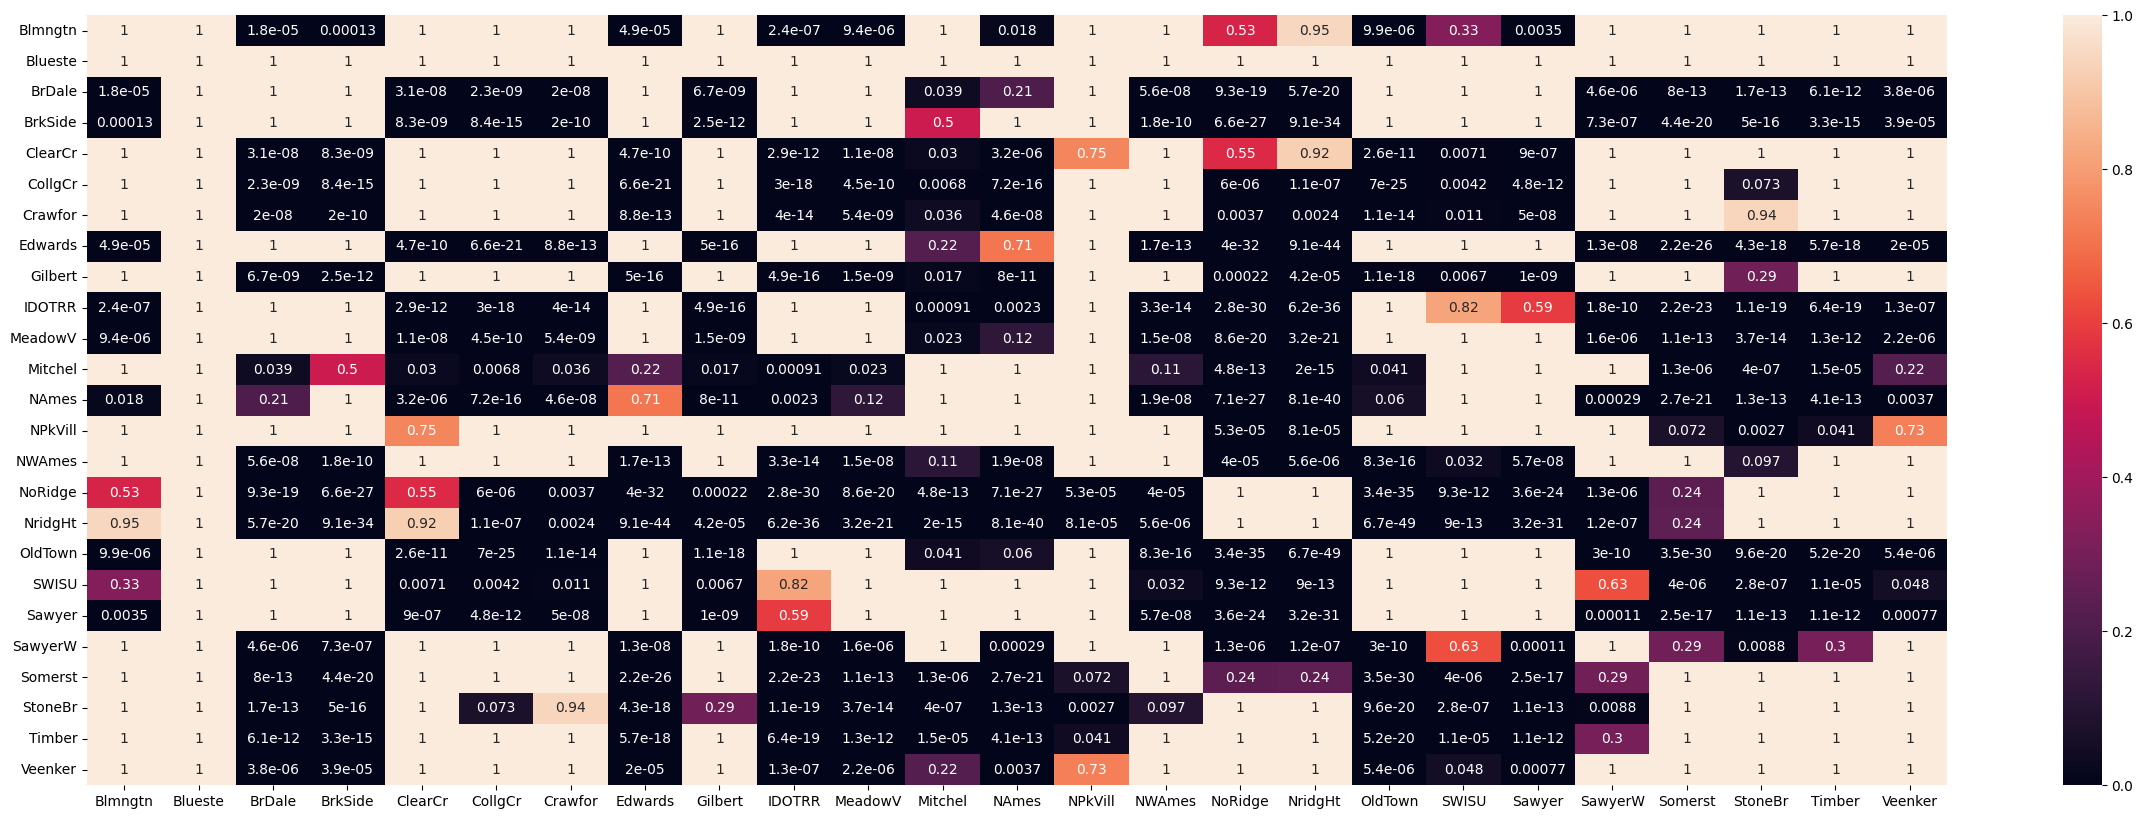

In [60]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.heatmap(list_dunn_matrices[1], annot = True)

## From the heatmap above we can see some groups with similar behaviours with high p-value between each other. So we will separate them in groups in order to aggregate the variables that doesn't differ significantly.

In [61]:
dataframe_dunn = list_dunn_matrices[1]

<Axes: >

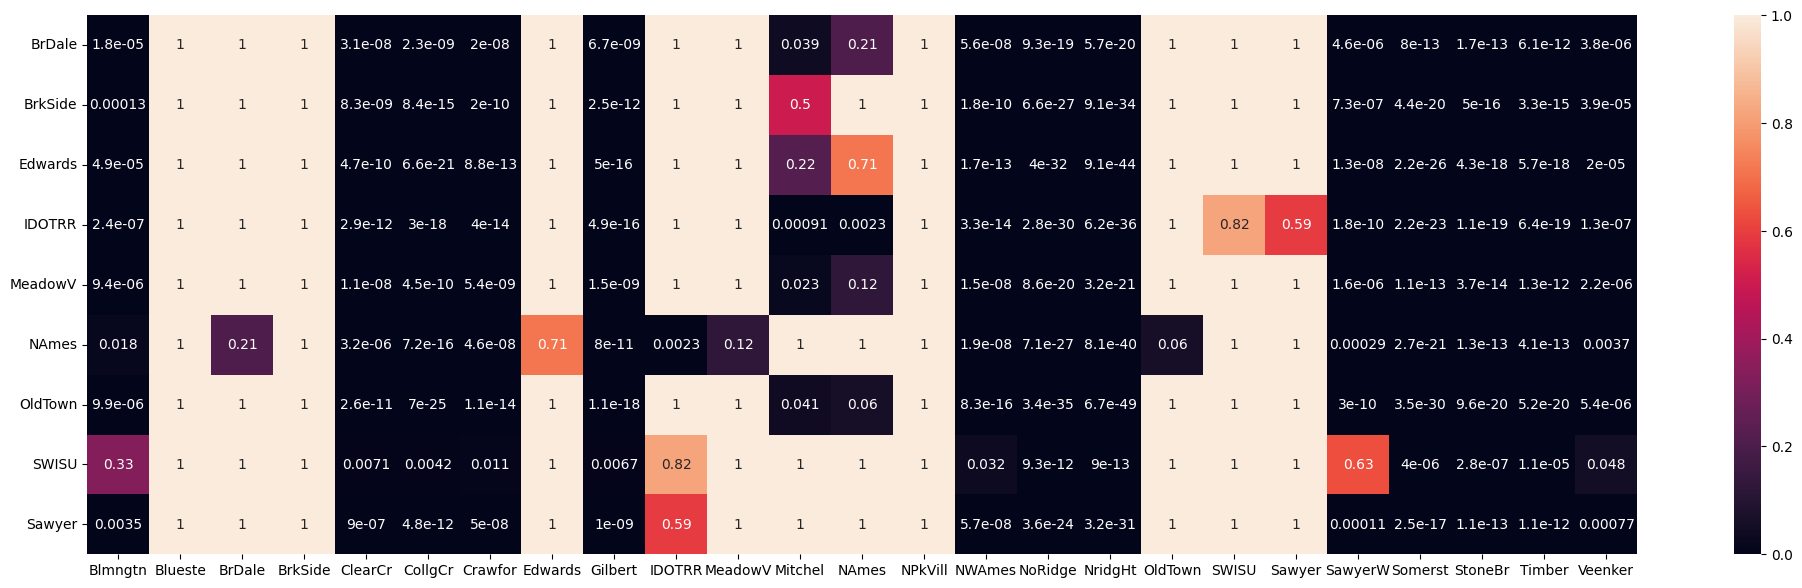

In [62]:
# GROUP A
group_a = ['BrDale', 'BrkSide', 'Edwards', 'IDOTRR', 'MeadowV', 'NAmes', 'OldTown', 'SWISU', 'Sawyer']

group_a_dunn_df = dataframe_dunn.loc[group_a]

fig, ax = plt.subplots(figsize=(25, 7))

sns.heatmap(group_a_dunn_df, annot=True)

In [63]:
# DataFrame with only the houses in the Group A neighborhoods

neighborhood_dataframe = cat_var_3v[['Neighborhood', 'SalePrice']]

df_group_a = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_a)]
df_group_a.head()

,Neighborhood,SalePrice
8,OldTown,129900
9,BrkSide,118000
10,Sawyer,129500
12,Sawyer,144000
14,NAmes,157000


<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

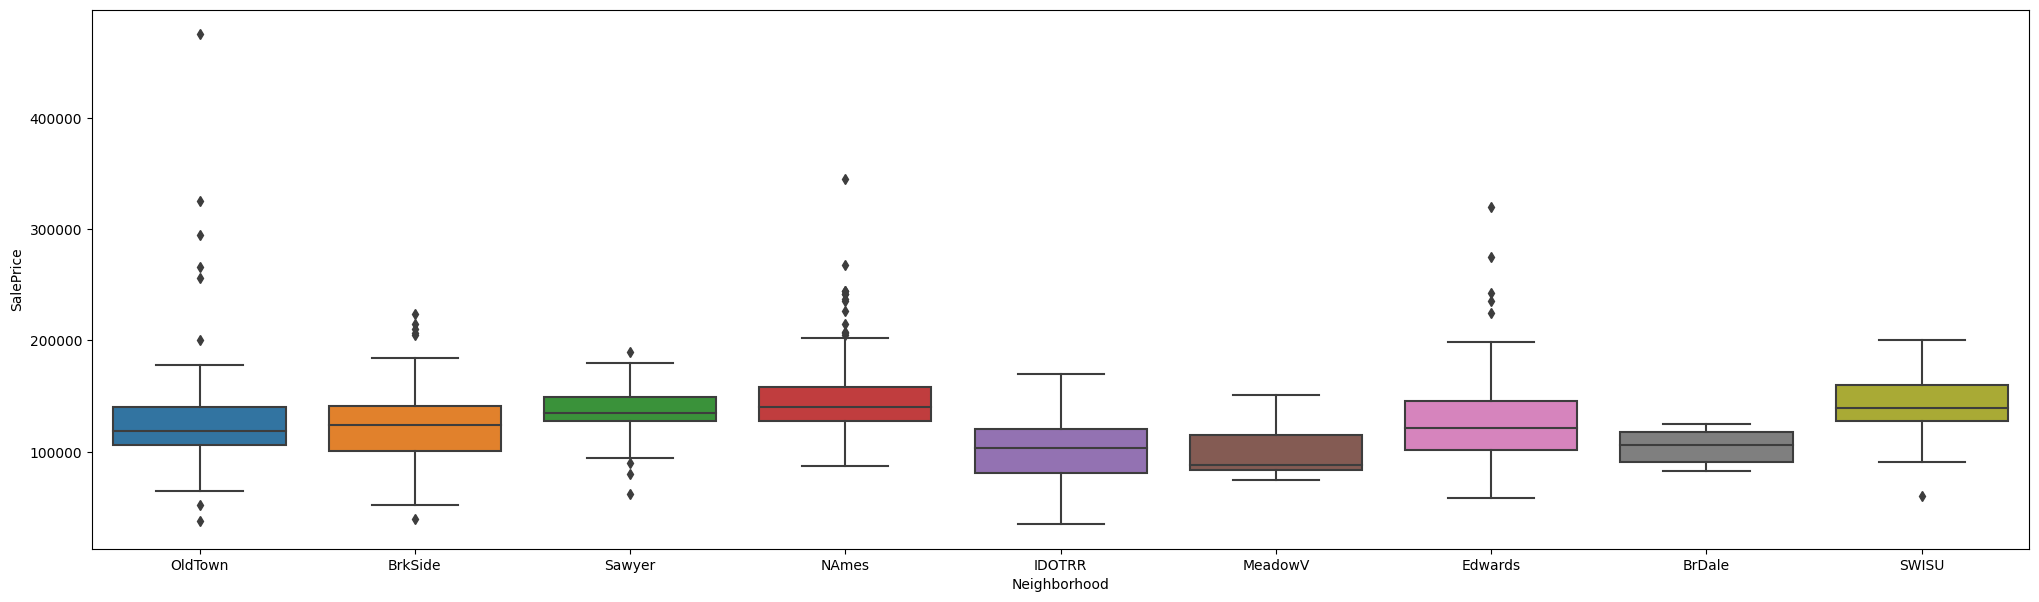

In [64]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.boxplot(data=df_group_a, x='Neighborhood', y='SalePrice')

<Axes: >

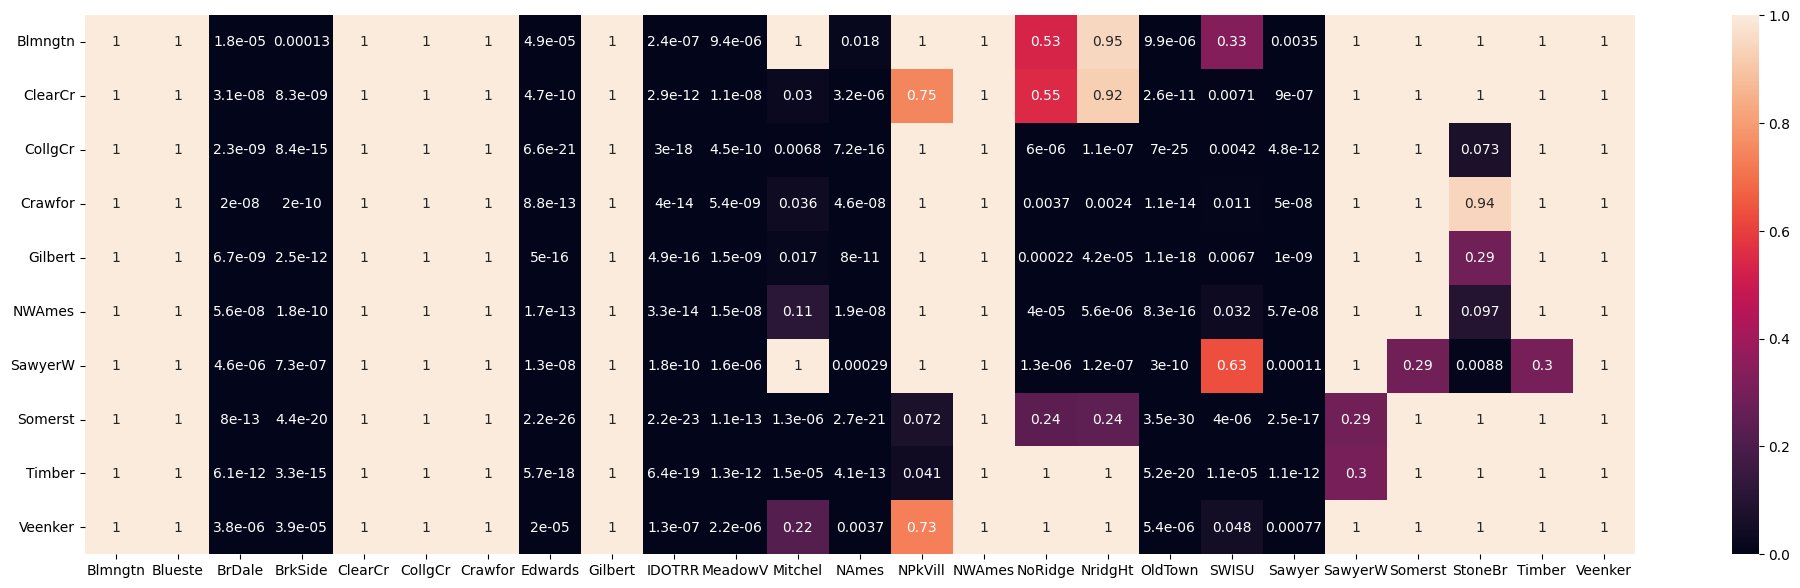

In [65]:
# GROUP B
group_b = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'SawyerW', 'Somerst', 'Timber', 'Veenker']

group_b_df = dataframe_dunn.loc[group_b]

fig, ax = plt.subplots(figsize=(25, 7))

sns.heatmap(group_b_df, annot=True)

In [66]:
df_group_b = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_b)]
df_group_b.head()

,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,140000
6,Somerst,307000


<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

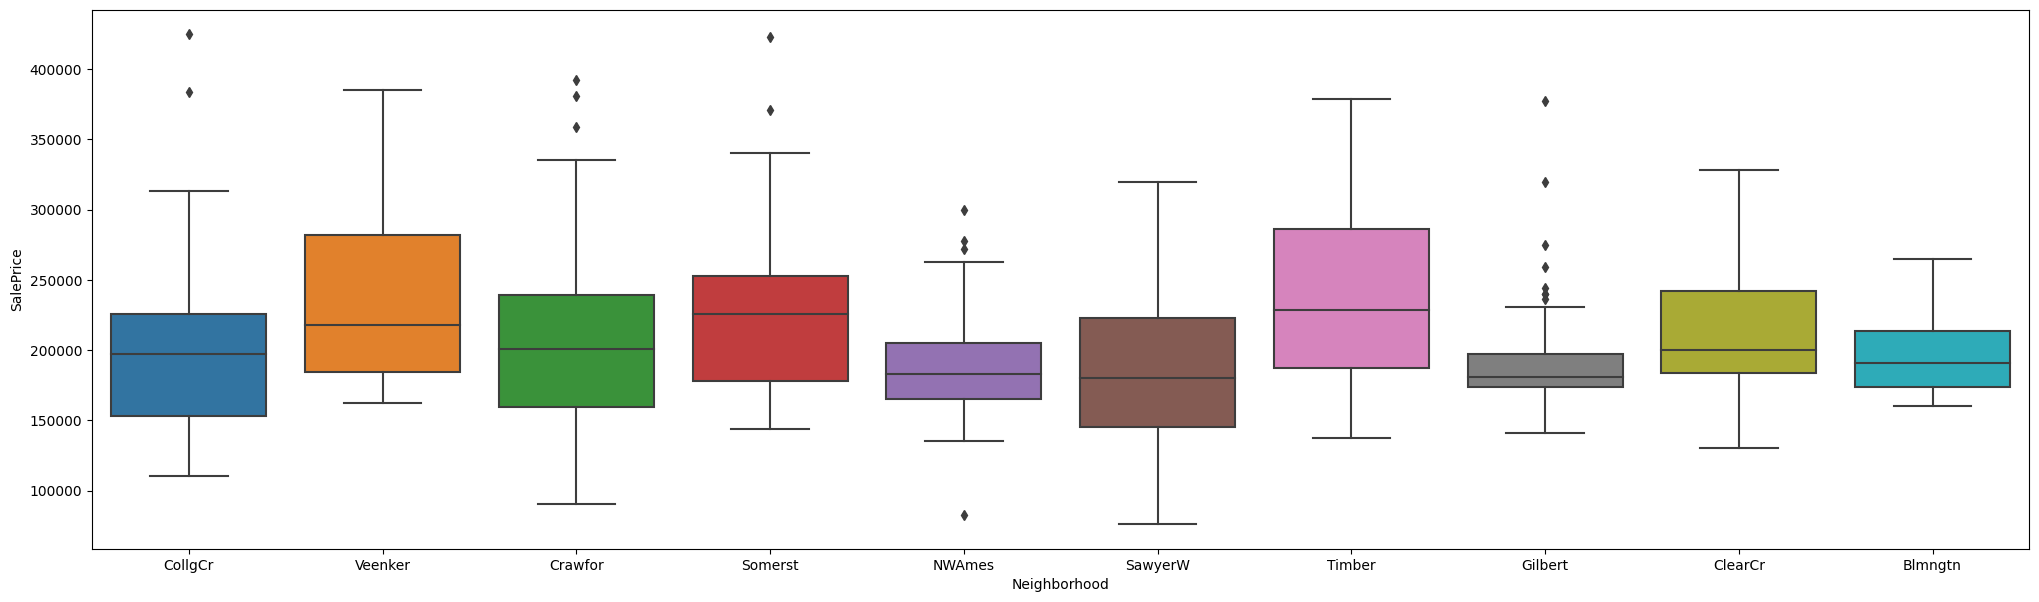

In [67]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.boxplot(data=df_group_b, x='Neighborhood', y='SalePrice')

<Axes: >

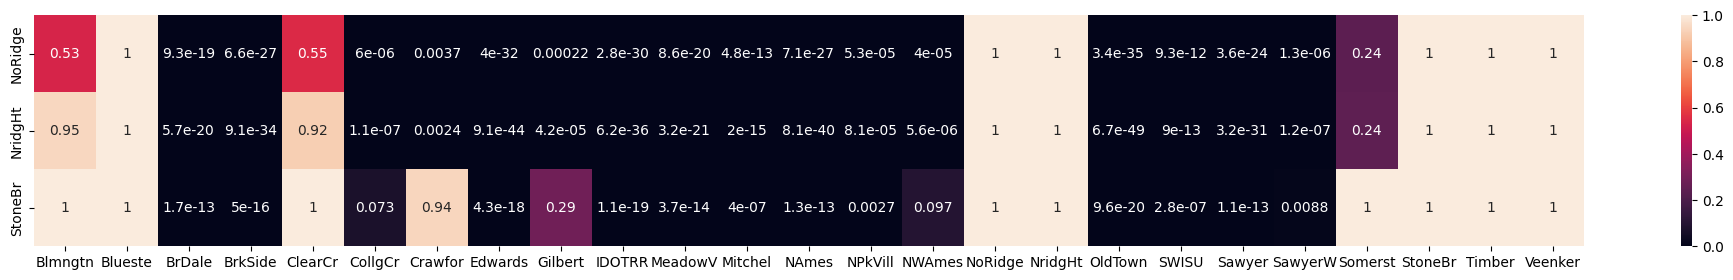

In [68]:
# Group C

group_c = ['NoRidge', 'NridgHt', 'StoneBr']

group_c_df = dataframe_dunn.loc[group_c]

fig, ax = plt.subplots(figsize=(25, 3))

sns.heatmap(group_c_df, annot=True)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

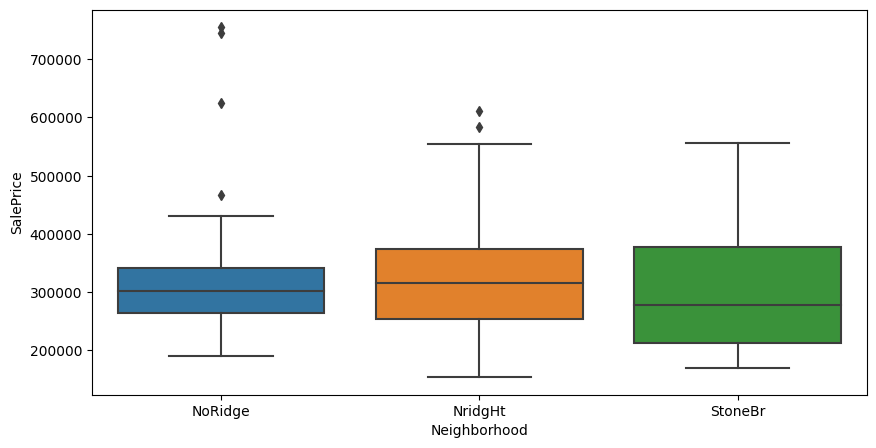

In [69]:
fig, ax = plt.subplots(figsize=(10, 5))

df_group_c = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_c)]
sns.boxplot(data=df_group_c, x='Neighborhood', y='SalePrice')

## As we can see by the boxplots, the houses in each group have a very similar SalePrice distribution

In [70]:
# Selecting the neighborhoods not in groups A, B or C

unique_neighborhoods = df_cat['Neighborhood'].unique().tolist()
unique_neighborhoods

['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']

In [71]:
# GROUP D
group_d = [x for x in unique_neighborhoods if x not in group_a]
group_d = [x for x in group_d if x not in group_b]
group_d = [x for x in group_d if x not in group_c]
group_d

['Mitchel', 'NPkVill', 'Blueste']

In [72]:
df_group_d = neighborhood_dataframe[neighborhood_dataframe['Neighborhood'].isin(group_d)]
df_group_d.head()

,Neighborhood,SalePrice
5,Mitchel,143000
46,Mitchel,239686
71,Mitchel,129500
81,Mitchel,153500
126,NPkVill,128000


In [73]:
group_d_df = dataframe_dunn.loc[group_d]

<Axes: >

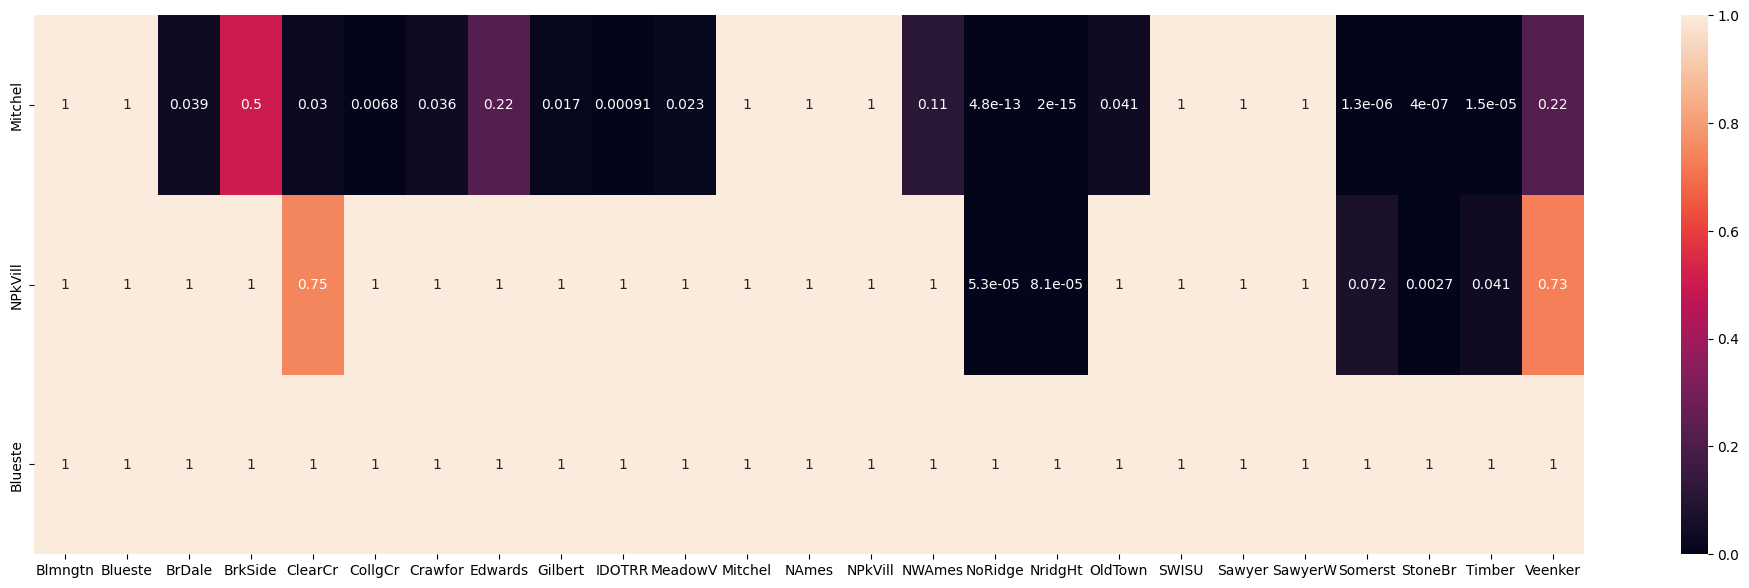

In [74]:
group_d_df = dataframe_dunn.loc[group_d]

fig, ax = plt.subplots(figsize=(25, 7))

sns.heatmap(group_d_df, annot=True)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

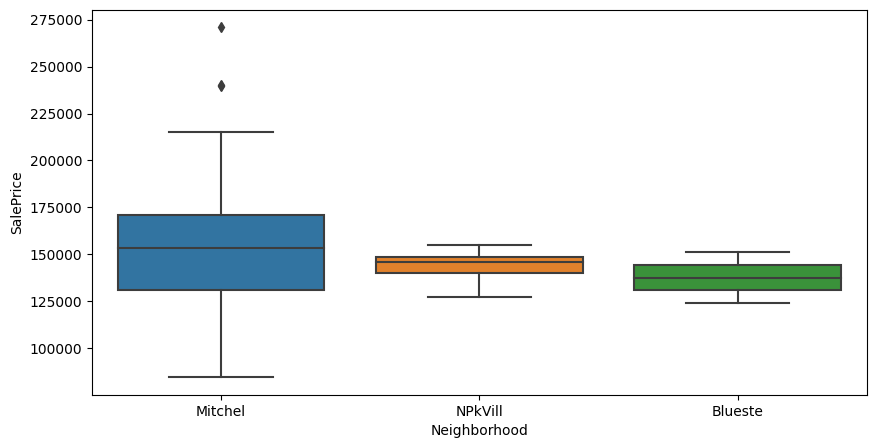

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_group_d, x='Neighborhood', y='SalePrice')

## These neighborhoods don't show much simmilarity with the other groups so they will be in group D.

### *The houses in the Mitchel group show some simmilarity with the B group, but they will remain in the D group because the p-value with the other groups are higher when compared to the groups in B.*

In [76]:
def neighborhood_processing(df):
    for index, row in df.iterrows():
        if row['Neighborhood'] in group_a:
            df.at[index,'Neighborhood'] = 'A'

        elif row['Neighborhood'] in group_b:
            df.at[index,'Neighborhood'] = 'B'

        elif row['Neighborhood'] in group_c:
            df.at[index,'Neighborhood'] = 'C'

        else:
            df.at[index,'Neighborhood'] = 'D'

In [77]:
neighborhood_processing(train)
neighborhood_processing(test)

In [78]:
train['Neighborhood'].value_counts()

A    665
B    592
C    143
D     60
Name: Neighborhood, dtype: int64

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

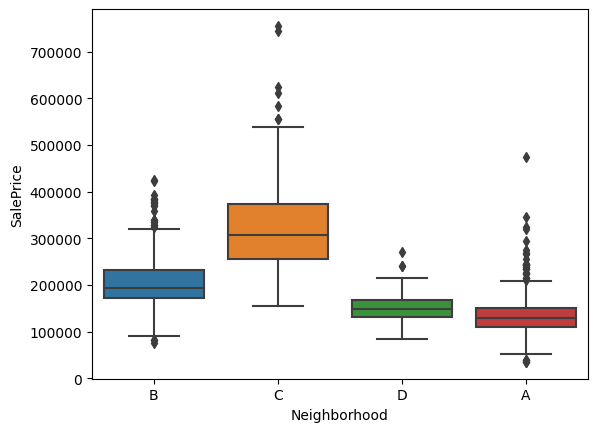

In [79]:
# New distribution of SalePrice per Neighborhood
train = train.join(df_target)
sns.boxplot(data=train, x='Neighborhood', y='SalePrice')

In [80]:
df_post_hoc.head()

,OverallQual,Neighborhood,GarageCars,ExterQual,KitchenQual,SalePrice
0,7,CollgCr,2,Gd,Gd,208500
1,6,Veenker,2,TA,TA,181500
2,7,CollgCr,2,Gd,Gd,223500
3,7,Crawfor,3,TA,Gd,140000
4,8,NoRidge,3,Gd,Gd,250000


## **EXTERNAL QUALITY**

<Axes: >

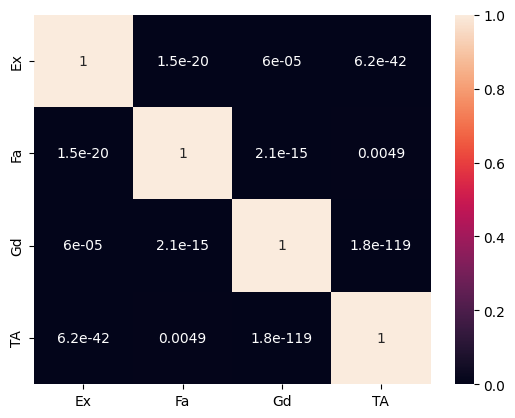

In [81]:
sns.heatmap(list_dunn_matrices[3], annot = True)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

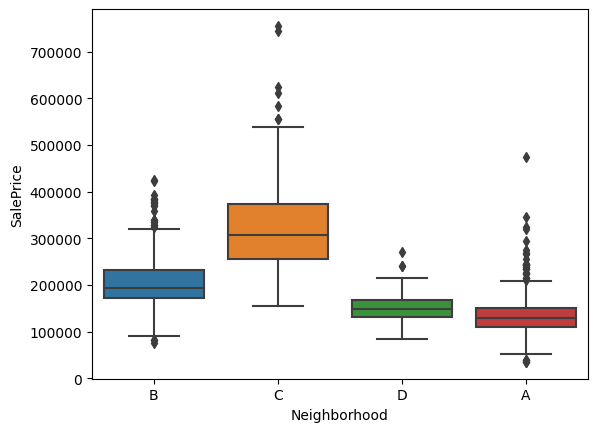

In [82]:
sns.boxplot(data=train, x=list_top5_cat_vars[1], y='SalePrice')

## **KITCHEN QUALITY**

<Axes: >

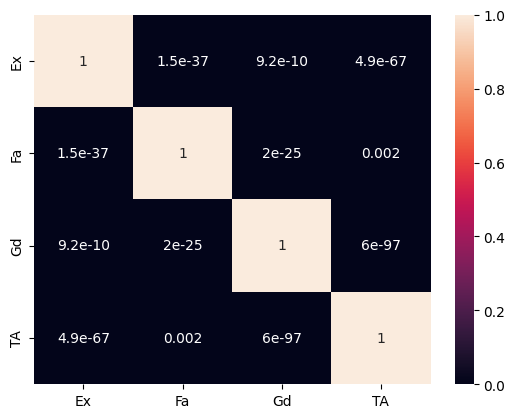

In [83]:
sns.heatmap(list_dunn_matrices[4], annot = True)

In [84]:
print(list_top5_cat_vars)

['OverallQual', 'Neighborhood', 'GarageCars', 'ExterQual', 'KitchenQual']


<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

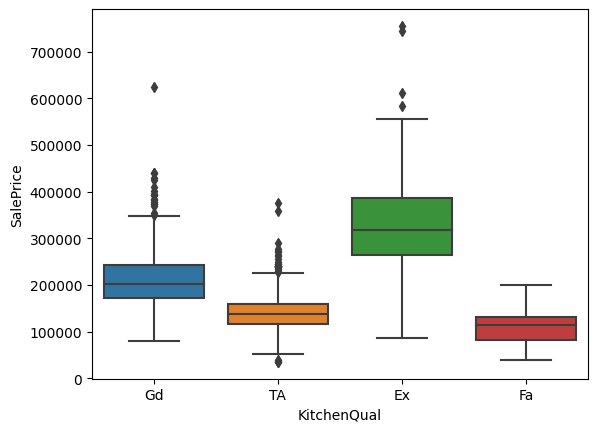

In [85]:
sns.boxplot(data=train, x=list_top5_cat_vars[4], y='SalePrice')

### The p-value between TA and Fa is more than 0.05 so this two groups will be merged

In [86]:
for index, row in train.iterrows():
    if row['KitchenQual'] in ['TA', 'Fa']:
        train.at[index,'KitchenQual'] = 'TA_Fa'


for index, row in test.iterrows():
    if row['KitchenQual'] in ['TA', 'Fa']:
        test.at[index,'KitchenQual'] = 'TA_Fa'

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

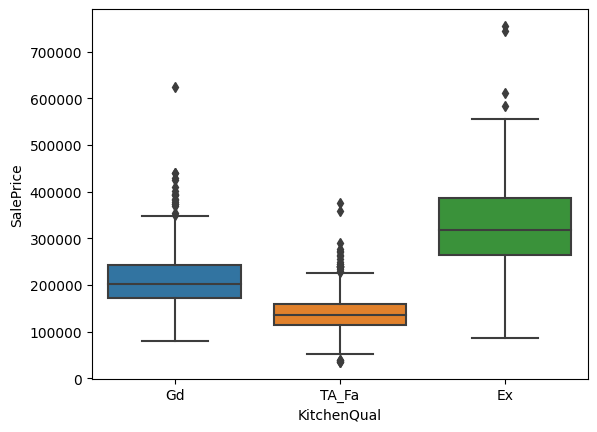

In [87]:
sns.boxplot(data=train, x=list_top5_cat_vars[4], y='SalePrice')

In [88]:
train['KitchenQual'].value_counts()

TA_Fa    774
Gd       586
Ex       100
Name: KitchenQual, dtype: int64

In [89]:
df_post_hoc.head()

,OverallQual,Neighborhood,GarageCars,ExterQual,KitchenQual,SalePrice
0,7,CollgCr,2,Gd,Gd,208500
1,6,Veenker,2,TA,TA,181500
2,7,CollgCr,2,Gd,Gd,223500
3,7,Crawfor,3,TA,Gd,140000
4,8,NoRidge,3,Gd,Gd,250000


In [90]:
train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

## **OverallQual**

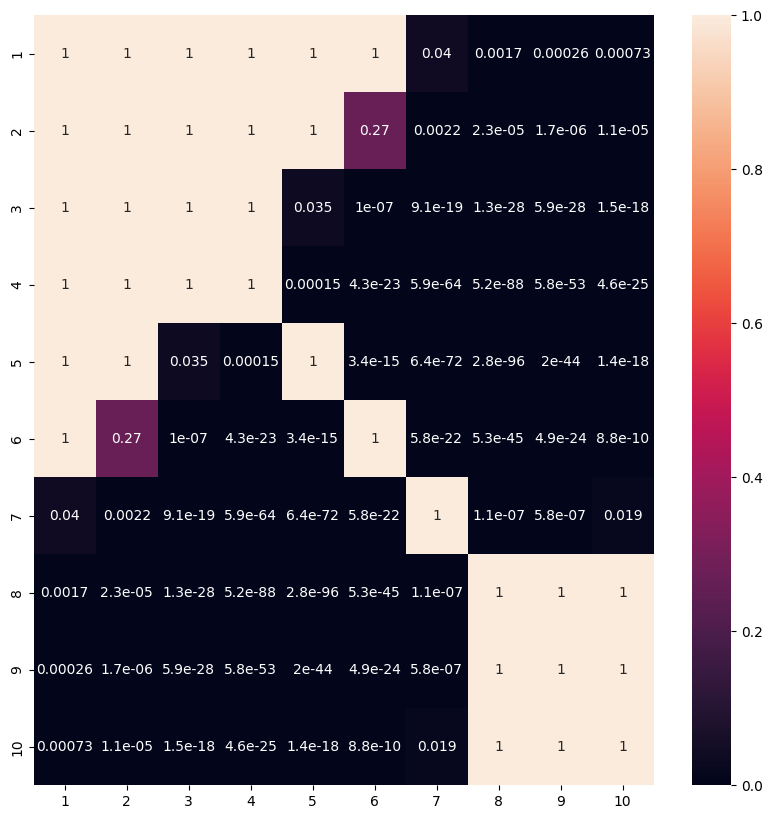

In [91]:
plt.figure(figsize=(10, 10))
sns.heatmap(list_dunn_matrices[0], annot=True)
plt.show()


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

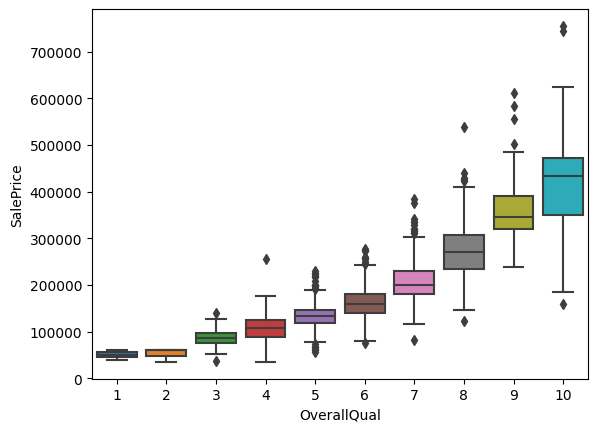

In [92]:
sns.boxplot(data=train, x=list_top5_cat_vars[0], y='SalePrice')

In [93]:
for index, row in train.iterrows():
  if row['OverallQual'] in [1,2]:
    train.at[index,'OverallQual'] = 12
  elif row['OverallQual'] in [3,4]:
    train.at[index,'OverallQual'] = 34
  elif row['OverallQual'] in [5,6]:
    train.at[index,'OverallQual'] = 56

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

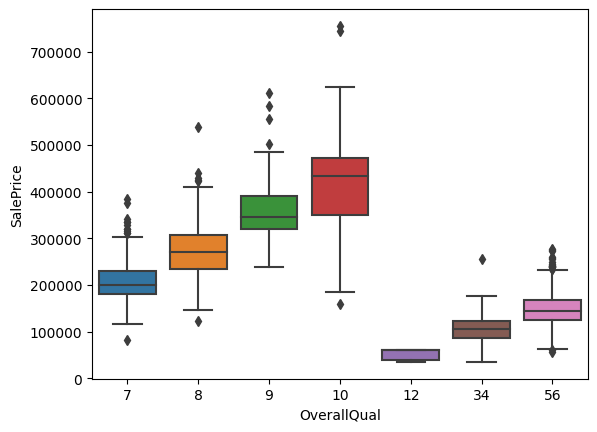

In [94]:
sns.boxplot(data=train, x=list_top5_cat_vars[0], y='SalePrice')

In [95]:
train['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

<Axes: >

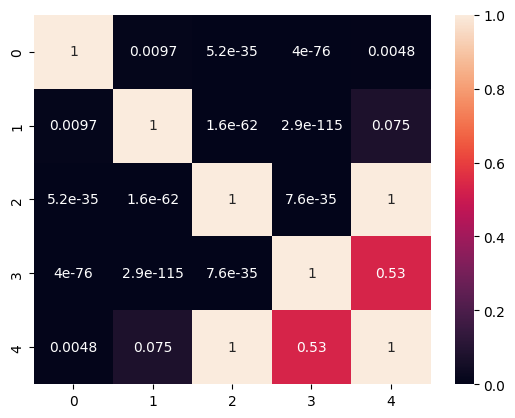

In [96]:
sns.heatmap(list_dunn_matrices[2], annot=True)

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

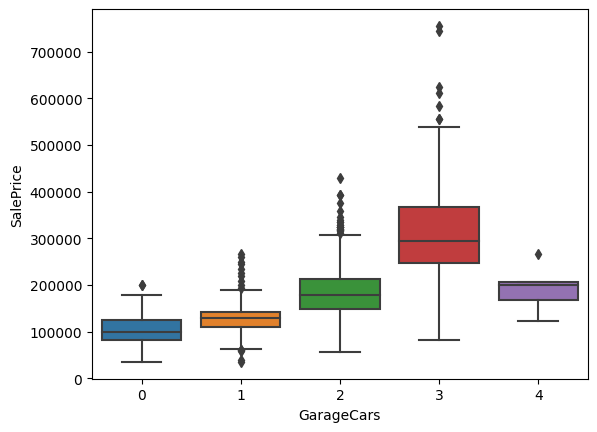

In [97]:
sns.boxplot(data=train, x=list_top5_cat_vars[2], y='SalePrice')

# **ONE HOT ENCONDING AND NAN TREATMENT**

### The NaN values will be replaces by the mode

In [98]:
train.isnull().sum()

Neighborhood     0
OverallQual      0
MasVnrArea       8
ExterQual        0
1stFlrSF         0
GrLivArea        0
KitchenQual      0
GarageYrBlt     81
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [99]:
test.isnull().sum()

Neighborhood     0
OverallQual      0
MasVnrArea      15
ExterQual        0
1stFlrSF         0
GrLivArea        0
KitchenQual      1
GarageYrBlt     78
GarageCars       1
GarageArea       1
dtype: int64

In [100]:
print(categorical_cols)
print(continuous_cols)

['OverallQual', 'Neighborhood', 'GarageCars', 'ExterQual', 'KitchenQual']
['GarageArea', 'MasVnrArea', 'GrLivArea', 'GarageYrBlt', '1stFlrSF']


<Axes: xlabel='GarageYrBlt', ylabel='Count'>

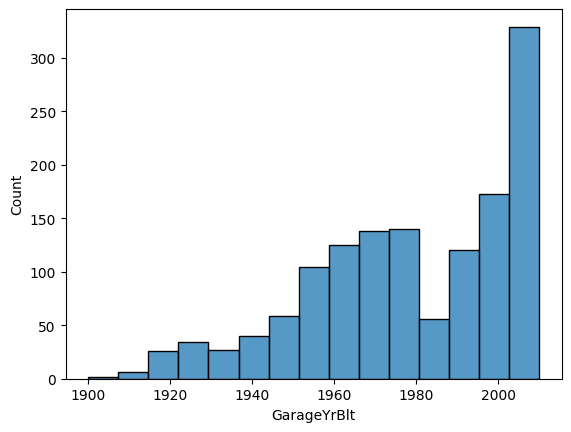

In [103]:
sns.histplot(data = train['GarageYrBlt'])

### train df has NaNs ony in MasVnrArea, replacing with mean

In [101]:
MasVnrArea_mean = train['MasVnrArea'].mean()
train['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)

In [104]:
GarageYrBlt_mode_year = train['GarageYrBlt'].mode().values[0]
train['GarageYrBlt'].fillna(GarageYrBlt_mode_year, inplace=True)

### test df has continuous variable (MasVnrArea , TotalBsmtSF , GarageArea) and categorical variables (GarageCars, KitchenQual) having NaNs.

In [109]:
# replacing NaNs in (MasVnrArea , TotalBsmtSF , GarageArea) using mean
MasVnrArea_mean = test['MasVnrArea'].mean()
test['MasVnrArea'].fillna(MasVnrArea_mean, inplace=True)

GarageYrBlt_mode_year = test['GarageYrBlt'].mode().values[0]
test['GarageYrBlt'].fillna(GarageYrBlt_mode_year, inplace=True)

GarageArea_mean = test['GarageArea'].mean()
test['GarageArea'].fillna(MasVnrArea_mean, inplace=True)

In [106]:
# replacing the NaNs in (GarageCars, KitchenQual) to the mode
GarageCars_mode_value = test['GarageCars'].mode().values[0]
test['GarageCars'].fillna(GarageCars_mode_value, inplace=True)

KitchenQual_mode_value = test['KitchenQual'].mode().values[0]
test['KitchenQual'].fillna(KitchenQual_mode_value, inplace=True)


In [107]:
train.isnull().sum()

Neighborhood    0
OverallQual     0
MasVnrArea      0
ExterQual       0
1stFlrSF        0
GrLivArea       0
KitchenQual     0
GarageYrBlt     0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [110]:
test.isnull().sum()

Neighborhood    0
OverallQual     0
MasVnrArea      0
ExterQual       0
1stFlrSF        0
GrLivArea       0
KitchenQual     0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [111]:
test.shape

(1459, 10)

In [112]:
test.isnull().sum()

Neighborhood    0
OverallQual     0
MasVnrArea      0
ExterQual       0
1stFlrSF        0
GrLivArea       0
KitchenQual     0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

### ONE-HOT-ENCODING

In [113]:
# The Categorical Variables are the top 5 most statistically significant and the CentralAir variable
final_cat_vars = list_top5_cat_vars

In [114]:
# final_cat_vars.remove('CentralAir')

In [115]:
final_cat_vars

['OverallQual', 'Neighborhood', 'GarageCars', 'ExterQual', 'KitchenQual']

In [116]:
# getting object type categorical features to apply one hot encoding
final_cat_vars = ['Neighborhood','ExterQual', 'KitchenQual']

In [117]:
train = pd.get_dummies(train, columns = final_cat_vars)
test = pd.get_dummies(test, columns = final_cat_vars)

In [118]:
train.head()

,OverallQual,MasVnrArea,1stFlrSF,GrLivArea,GarageYrBlt,GarageCars,GarageArea,SalePrice,Neighborhood_A,Neighborhood_B,Neighborhood_C,Neighborhood_D,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA_Fa
0,7,196.0,856,1710,2003.0,2,548,208500,0,1,0,0,0,0,1,0,0,1,0
1,56,0.0,1262,1262,1976.0,2,460,181500,0,1,0,0,0,0,0,1,0,0,1
2,7,162.0,920,1786,2001.0,2,608,223500,0,1,0,0,0,0,1,0,0,1,0
3,7,0.0,961,1717,1998.0,3,642,140000,0,1,0,0,0,0,0,1,0,1,0
4,8,350.0,1145,2198,2000.0,3,836,250000,0,0,1,0,0,0,1,0,0,1,0


In [119]:
train_df = train
test_df = test

In [120]:
train_df.isna().sum()

OverallQual          0
MasVnrArea           0
1stFlrSF             0
GrLivArea            0
GarageYrBlt          0
GarageCars           0
GarageArea           0
SalePrice            0
Neighborhood_A       0
Neighborhood_B       0
Neighborhood_C       0
Neighborhood_D       0
ExterQual_Ex         0
ExterQual_Fa         0
ExterQual_Gd         0
ExterQual_TA         0
KitchenQual_Ex       0
KitchenQual_Gd       0
KitchenQual_TA_Fa    0
dtype: int64

In [121]:
test_df.isna().sum()

OverallQual          0
MasVnrArea           0
1stFlrSF             0
GrLivArea            0
GarageYrBlt          0
GarageCars           0
GarageArea           0
Neighborhood_A       0
Neighborhood_B       0
Neighborhood_C       0
Neighborhood_D       0
ExterQual_Ex         0
ExterQual_Fa         0
ExterQual_Gd         0
ExterQual_TA         0
KitchenQual_Ex       0
KitchenQual_Gd       0
KitchenQual_TA_Fa    0
dtype: int64

In [122]:
print(continuous_cols)
print(categorical_cols)

['GarageArea', 'MasVnrArea', 'GrLivArea', 'GarageYrBlt', '1stFlrSF']
['OverallQual', 'Neighborhood', 'GarageCars', 'ExterQual', 'KitchenQual']


In [123]:
train_df.shape

(1460, 19)

In [124]:
train_df.columns

Index(['OverallQual', 'MasVnrArea', '1stFlrSF', 'GrLivArea', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice', 'Neighborhood_A',
       'Neighborhood_B', 'Neighborhood_C', 'Neighborhood_D', 'ExterQual_Ex',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'KitchenQual_TA_Fa'],
      dtype='object')

In [125]:
MasVnrArea_mean = train_df['MasVnrArea'].mean()

In [126]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(MasVnrArea_mean)

# **ML MODELS**

## *SPLIT DATA*

In [127]:
from sklearn.model_selection import train_test_split

X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

## **Multiple Linear Regression**

In [128]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred_lin_reg = linear_regressor.predict(X_test)


In [129]:

from sklearn.metrics import mean_squared_log_error
lr_error = mean_squared_log_error(y_pred_lin_reg, y_test, squared = False)
lr_error

0.16937021782725414

In [130]:
lr_pred = linear_regressor.predict(test_df)

lr_pred

array([109891.94447868, 150836.45933507, 184929.66755191, ...,
       158693.00122415, 115501.30041045, 205002.25440891])


### *FUNCTION TO CREATE THE SUBMISSION DATAFRAME*

In [131]:
def submission_df(pred_array):
    lr_submission = pd.DataFrame(pred_array, columns = ['SalePrice'])
    lr_submission['Id'] = lr_submission.index + 1461
    lr_submission = lr_submission[lr_submission.columns[::-1]]
    return lr_submission

In [132]:
lr_submission = submission_df(lr_pred)
lr_submission.head()

,Id,SalePrice
0,1461,109891.944479
1,1462,150836.459335
2,1463,184929.667552
3,1464,195490.494422
4,1465,237103.618770


### *FUNCTION TO CREATE THE FILE SUBMISSION LINK*

In [133]:
from IPython.display import HTML

def create_download_link(title = "Download CSV file", filename = "data.csv"):
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

### Linear Regression submission

In [134]:
lr_submission.to_csv('lr_submission.csv', index=False)

create_download_link(filename='lr_submission.csv')

## **LASSO REGRESSION**

In [135]:
# LASSO REGRESSION

from sklearn.linear_model import Lasso

las_reg = Lasso(alpha=1)

las_reg.fit(X_train, y_train)

Lasso(alpha=1)

In [136]:
las_pred_test = las_reg.predict(X_test)

las_error = mean_squared_log_error(las_pred_test, y_test, squared = False)
las_error

0.16937404807118972

In [137]:
# Predicting the prices with the Lasso Regression
y_pred_las_reg = las_reg.predict(test_df)

# Converting the array in the submission Dataframe
las_submission = submission_df(y_pred_las_reg)

las_submission.head()

,Id,SalePrice
0,1461,109904.957900
1,1462,150843.433029
2,1463,184937.079368
3,1464,195499.467097
4,1465,237090.376719


In [138]:
las_submission.to_csv('las_submission.csv', index=False)

create_download_link(filename='las_submission.csv')

## **RANDOM FOREST**

In [139]:
# RANDOM FOREST

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train);

rf_predictions = rf.predict(X_test)

rf_error = mean_squared_log_error(rf_predictions, y_test, squared = False)
rf_error

0.1640744915979394

In [140]:
rf_predictions = rf.predict(test_df)

rf_submission = submission_df(rf_predictions)

rf_submission.to_csv('rf_submission.csv', index=False)

create_download_link(filename='rf_submission.csv')

## **XG BOOST**

In [141]:
# XG BOOST

# X_train, X_test, y_train, y_test

import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
xgb_pred = xgb_r.predict(X_test)

In [142]:
xgb_error = mean_squared_log_error(xgb_pred, y_test, squared = False)
xgb_error

0.16848819565241865

In [143]:
xgb_predictions = xgb_r.predict(test_df)

xgb_submission = submission_df(xgb_predictions)

xgb_submission.to_csv('xgb_submission.csv', index=False)

create_download_link(filename='xgb_submission.csv')

## **ELASTIC NET REGRESSION**

In [144]:
# ELASTIC NET REGRESSION
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)

e_net_pred = e_net.predict(X_test)

In [145]:
e_net_error = mean_squared_log_error(e_net_pred, y_test, squared = False)
e_net_error

0.19755010755816774

In [146]:
e_net_predictions = xgb_r.predict(test_df)

e_net_submission = submission_df(e_net_predictions)

e_net_submission.to_csv('e_net_submission.csv', index=False)

create_download_link(filename='e_net_submission.csv')

## As we can see all the ML models have a similar performance of around 0.2, so to improve the models it could be done a different approach in the EDA or we can refine the model furthur(by using appropiate hyperparameters)
